In [26]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.axes import Axes
from matplotlib import cm

from ect import (
    sidelobe,
    spacenorm,
    freqnorm,
    complex_to_hsv,
    ilogpolar_new as ilogpolar,
    vectors,
    Config
) 

from ect.transforms.utils_new import antialias



### Sidelobe display

In [27]:
def px_vectors(image: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    Y, X = image.shape
    x = np.linspace(0, X, X, endpoint=False)
    y = np.linspace(0, Y, Y, endpoint=False)
    return np.meshgrid(x, y)

In [28]:
SUPTITLE = "Sample Image"
TITLE_LOG = "Filtr połówkowy - wykres 3D"
TITLE_CART = "Image - 3d -"
XAXIS_CART = "$x$"
YAXIS_CART = "$y$"
XAXIS_LOG = "$\\rho$"
YAXIS_LOG = "$\\phi$"
ZAXIS_CART = "$SNF(x, y)$"
ZAXIS_LOG = "$SNF(\\rho, \\phi)$"

def display_sidelobe(cartesian: np.ndarray, logpolar: np.ndarray) -> None:

    fig, axd = plt.subplot_mosaic(
        [["logpolar"]],
        per_subplot_kw={
            # "cartesian":{"projection": "3d"},
            "logpolar":{"projection":"3d"}
        })
    
    fig.set_figheight(7.5)
    fig.set_figwidth(10)
    # fig.suptitle(SUPTITLE)

    # ax1: Axes = axd["cartesian"]
    # s = ax1.plot_surface(*px_vectors(cartesian), cartesian,
    #     cmap = cm.coolwarm)
    # ax1.set_xlabel(XAXIS_CART)
    # ax1.set_ylabel(YAXIS_CART)
    # ax1.set_zlabel(ZAXIS_CART)
    # ax1.set_title(TITLE_CART)

    ax2: Axes = axd["logpolar"]
    s = ax2.plot_surface(*px_vectors(logpolar), logpolar,
        cmap = cm.coolwarm)
    ax2.set_xlabel(XAXIS_LOG)
    ax2.set_ylabel(YAXIS_LOG)
    ax2.set_zlabel(ZAXIS_LOG)
    ax2.set_title(TITLE_LOG)



2024-06-13 21:39:05.274 | DEBUG    | ect.maps.ilogpolar_new:ilogpolar:78 - Running logpolar transform in offset mode
2024-06-13 21:39:05.279 | DEBUG    | ect.maps.ilogpolar_new:ilogpolar:94 - Applying bilinear pixel mapping


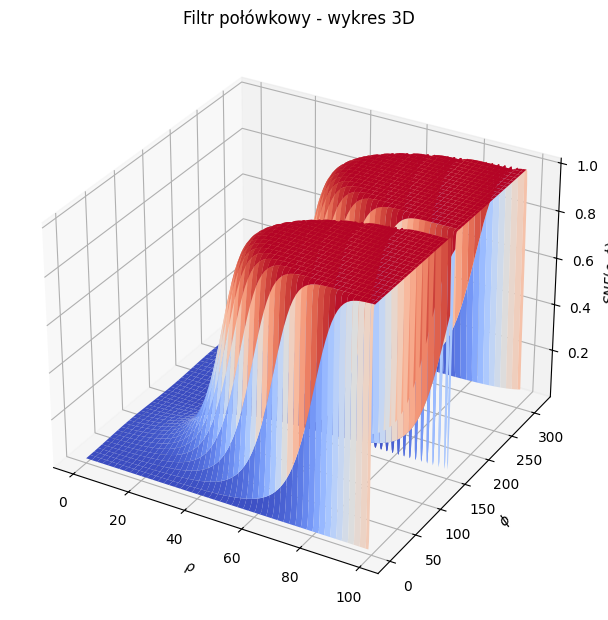

In [29]:
dsize = (314, 100)
dsize_cart = (200, 200)
radius = 50
filt = sidelobe(dsize, Config(sidelobe_slope=1))
filt_cart = ilogpolar(filt, dsize_cart, radius, Config())

display_sidelobe(filt_cart, filt)


In [30]:
SUPTITLE = "Jądro transformacji FECT - antyaliasing"
# TITLE_LOG = "Image - Logpolar"
# TITLE_CART = "Image - 3d -"
# XAXIS_CART = "$x$"
# YAXIS_DOMAIN = "$y$"
XAXIS_LOG = "$\\rho$"
YAXIS_LOG = "$\\phi$"
#ZAXIS_CART = "$SNF(x, y)$"
ZAXIS_LOG = "$K(\\rho, \\phi)$"

def display_antialias(kernel: np.ndarray) -> None:

    fig, axd = plt.subplot_mosaic(
        [["domain", "logpolar"]],
        width_ratios=[0.33, 1],
        per_subplot_kw={
            # "cartesian":{"projection": "3d"}, 
            "logpolar":{"projection":"3d"}
        })
    
    fig.set_figheight(7.5)
    fig.set_figwidth(10)
    fig.suptitle(SUPTITLE)

    ax1: Axes = axd["domain"]
    ax1.imshow(complex_to_hsv(kernel))
    ax1.set_xlabel(XAXIS_LOG)
    ax1.set_ylabel(YAXIS_LOG)
    # ax1.set_zlabel(ZAXIS_DOMAIN)
    # ax1.set_title(TITLE_DOMAIN)

    ax2: Axes = axd["logpolar"]
    s = ax2.plot_surface(*px_vectors(kernel), np.abs(kernel),
        cmap = cm.jet)
    ax2.set_xlabel(XAXIS_LOG)
    ax2.set_ylabel(YAXIS_LOG)
    ax2.set_zlabel(ZAXIS_LOG)
    # ax2.set_title(TITLE_LOG)

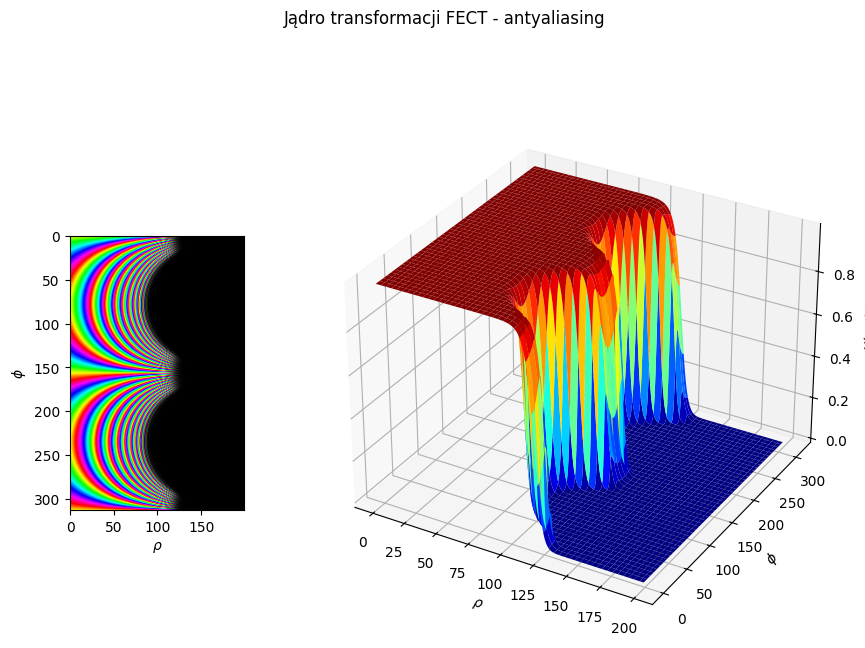

In [31]:
c = Config()
P, R = 314, 200
rhos, phis, xs, ys = vectors((P, R), c)
rhos, phis, xs, ys = rhos[:, R:], phis[:, R:], xs[:, R:], ys[:, R:]

from ect import AntialiasParameters, Config
from ect.transforms.utils_new import antialias

factors = Config().antialias_factors
kernel = np.exp(-2*np.pi*1j*np.exp(rhos)*np.cos(phis))
params = [
        AntialiasParameters(factor=factors[0], threshold=np.log(dsize[1]), vector=xs),
        AntialiasParameters(factor=factors[1], threshold=np.pi, vector=ys)
]

# plt.imshow(np.real(kernel))
display_antialias(antialias(kernel, params))

In [32]:
# SUPTITLE = "Jądro transformacji FECT - antyaliasing"
TITLE_LOG = "Image 3D filtra - przestrzeń log-polarna"
TITLE_CART = "Wykres 3D filtra - przestrzeń XY"
TITLE_CROSS = "Wykres filtra normalizującego dla $\\phi = const$"
# XAXIS_CART = "$x$"
# YAXIS_DOMAIN = "$y$"
XAXIS_LOG = "$\\rho$"
YAXIS_LOG = "$\\phi$"
ZAXIS_CART = "$FNF(x, y)$"
ZAXIS_LOG = "$FNF(\\rho, \\phi)$"

def display_filter(filt: np.ndarray, filt_cart: np.ndarray) -> None:

    fig, axd = plt.subplot_mosaic(
        [["cross", "cross"],["logpolar", "cartesian"]],
        width_ratios=[1, 1],
        height_ratios=[0.5, 1],
        per_subplot_kw={
            "cartesian":{"projection": "3d"}, 
            "logpolar":{"projection":"3d"}
        })
    
    fig.set_figheight(8)
    fig.set_figwidth(10)
    # fig.suptitle(SUPTITLE)

    ax0: Axes = axd["cross"]
    ax0.plot(range(filt.shape[1]), filt[0,:])
    ax0.set_title(TITLE_CROSS)
    ax0.set_xlabel(XAXIS_LOG)
    ax0.set_ylabel("value")
    ax0.grid()

    ax1: Axes = axd["cartesian"]
    s = ax1.plot_surface(*px_vectors(filt_cart), filt_cart,
        cmap = cm.coolwarm)
    ax1.set_xlabel(XAXIS_CART)
    ax1.set_ylabel(YAXIS_CART)
    ax1.set_zlabel(ZAXIS_CART)
    ax1.set_title(TITLE_CART)

    ax2: Axes = axd["logpolar"]
    s = ax2.plot_surface(*px_vectors(filt), filt,
        cmap = cm.coolwarm)
    ax2.set_xlabel(XAXIS_LOG)
    ax2.set_ylabel(YAXIS_LOG)
    ax2.set_zlabel(ZAXIS_LOG)
    ax2.set_title(TITLE_LOG)


2024-06-13 21:39:06.997 | DEBUG    | ect.maps.ilogpolar_new:ilogpolar:66 - Running logpolar transform in omit mode


2024-06-13 21:39:07.015 | DEBUG    | ect.maps.ilogpolar_new:ilogpolar:94 - Applying bilinear pixel mapping


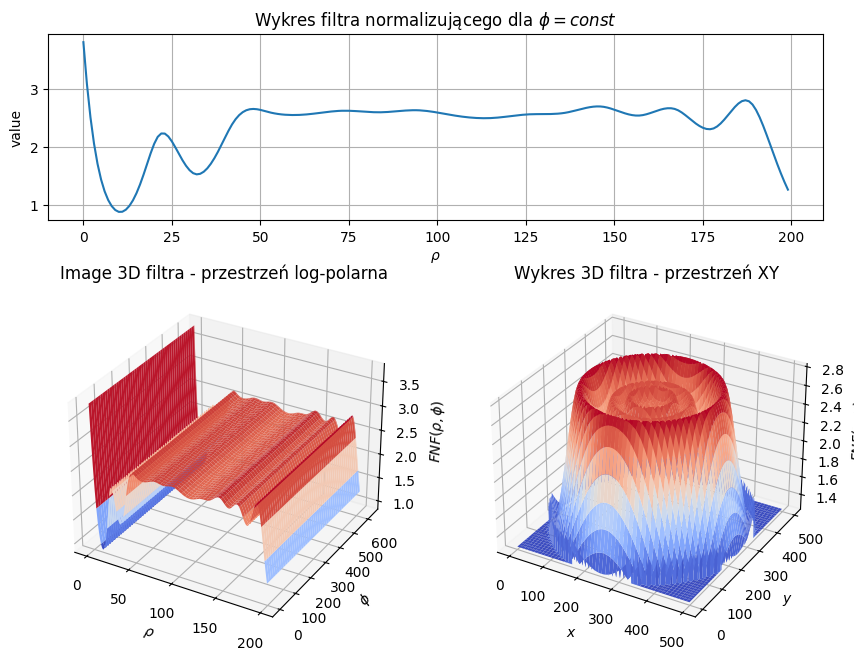

In [33]:
dsize = (628, 200)
cartsize = (500, 500)
r = 250
filt = freqnorm(dsize, Config())
filt_cart = ilogpolar(filt, cartsize, r, Config(mode="omit", offset_value_px=0))
filt_cart[filt_cart==0] = filt[:,-1].min()
 
Config()

display_filter(filt, filt_cart)

2024-06-13 21:39:08.852 | DEBUG    | ect.maps.ilogpolar_new:ilogpolar:66 - Running logpolar transform in omit mode
2024-06-13 21:39:08.867 | DEBUG    | ect.maps.ilogpolar_new:ilogpolar:94 - Applying bilinear pixel mapping


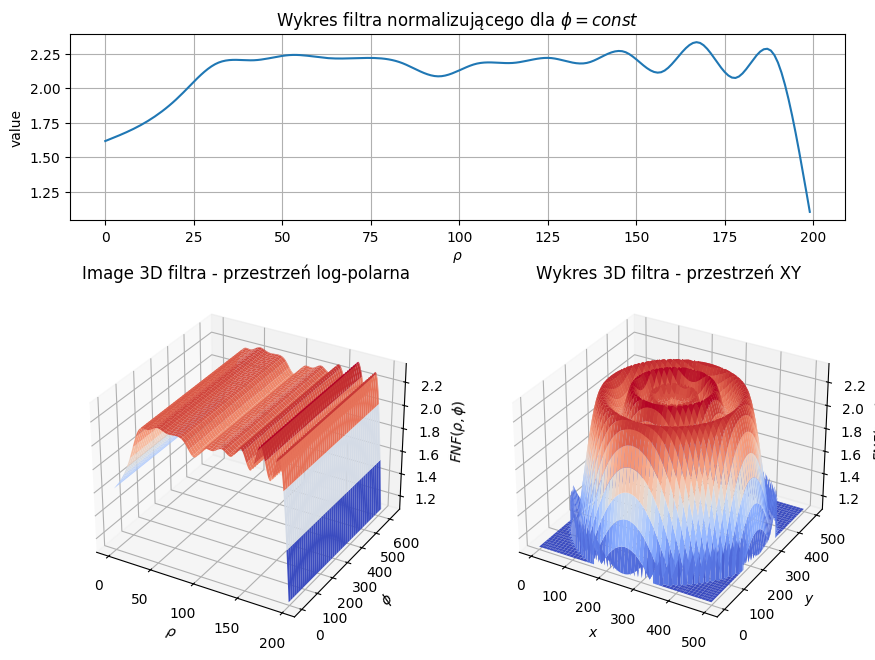

In [34]:
dsize = (628, 200)
cartsize = (500, 500)
r = 250
filt = spacenorm(dsize, Config())
filt_cart = ilogpolar(filt, cartsize, r, Config(mode="omit", offset_value_px=0))
filt_cart[filt_cart==0] = filt[:,-1].min()
 
display_filter(filt, filt_cart)

In [35]:
Config().spacenorm_knots

[1.6175,
 1.739,
 1.9404,
 2.178,
 2.2013,
 2.2393,
 2.2169,
 2.218,
 2.1818,
 2.0851,
 2.1757,
 2.1821,
 2.2178,
 2.1828,
 2.2628,
 2.1157,
 2.3304,
 2.0736,
 2.2568,
 1.1056]

In [36]:
rhos = [0.,         0.27746451, 0.55492903, 0.83239354, 1.10985806, 1.38732257,
 1.66478709, 1.9422516,  2.21971612, 2.49718063, 2.77464515, 3.05210966,
 3.32957418, 3.60703869, 3.88450321, 4.16196772, 4.43943224, 4.71689675,
 4.99436126, 5.27182578,]

for r in rhos:
    print(f"{r:.3f}")

0.000
0.277
0.555
0.832
1.110
1.387
1.665
1.942
2.220
2.497
2.775
3.052
3.330
3.607
3.885
4.162
4.439
4.717
4.994
5.272
